# ASSIGNMENT 3 - TASKS

# 1. Downloading and unzipping dataset

In [ ]:
!unzip 'drive/MyDrive/sample_data/Flowers-Dataset.zip'

Archive:  drive/MyDrive/sample_data/Flowers-Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_

# 2. Image Augmentation

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
batch_size = 32
img_height = 180
img_width = 180
data_dir = "/content/flowers"

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True, vertical_flip = True, zoom_range = 0.2)

In [ ]:
x_train = train_datagen.flow_from_directory('/content/flowers',
                                                target_size=(64,64),
                                                class_mode='categorical',
                                                batch_size=100)

Found 4317 images belonging to 5 classes.


In [ ]:
data_augmentation = Sequential(
  [
    layers.RandomFlip("vertical",input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

# 3. Creating Model

In [ ]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
model = Sequential()

In [ ]:
training_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=57,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4317 files belonging to 5 classes.
Using 3454 files for training.


In [ ]:
validation_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
seed=107,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [ ]:
training_ds.class_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

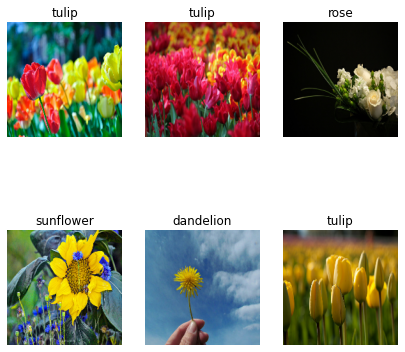

In [ ]:
plt.figure(figsize=(7, 7))
for data, labels in training_ds.take(1):
  for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(data[i].numpy().astype("uint8"))
    plt.title(training_ds.class_names[labels[i]])
    plt.axis("off")

# 3a. Convolution layer

In [ ]:
model.add(Convolution2D(32, (3,3), activation = "relu", input_shape = (64,64,3) ))

# 3b. Maxpooling layer

In [20]:
model.add(MaxPooling2D(pool_size = (2,2)))

# 3c. Flatten

In [21]:
model.add(Flatten())

# 3d. Hidden/Dense layers

In [22]:
model.add(Dense(300, activation = "relu"))
model.add(Dense(150, activation = "relu"))

# 3e. Output layer

In [23]:
model.add(Dense(5, activation = "softmax"))

# 4. Compiling the Model

In [24]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# 5. Fit The Model

In [25]:
model.fit(x_train, epochs = 15, steps_per_epoch = len(x_train))

Epoch 1/15
44/44 [==============================] - 18s 398ms/step - loss: 1.3774 - accuracy: 0.4223
Epoch 2/15
44/44 [==============================] - 18s 406ms/step - loss: 1.1272 - accuracy: 0.5298
Epoch 3/15
44/44 [==============================] - 19s 436ms/step - loss: 1.0545 - accuracy: 0.5719
Epoch 4/15
44/44 [==============================] - 19s 420ms/step - loss: 1.0108 - accuracy: 0.5942
Epoch 5/15
44/44 [==============================] - 20s 452ms/step - loss: 0.9347 - accuracy: 0.6275
Epoch 6/15
44/44 [==============================] - 18s 410ms/step - loss: 0.9037 - accuracy: 0.6454
Epoch 7/15
44/44 [==============================] - 19s 437ms/step - loss: 0.8823 - accuracy: 0.6562
Epoch 8/15
44/44 [==============================] - 18s 403ms/step - loss: 0.8465 - accuracy: 0.6715
Epoch 9/15
44/44 [==============================] - 18s 399ms/step - loss: 0.8006 - accuracy: 0.6928
Epoch 10/15
44/44 [==============================] - 18s 404ms/step - loss: 0.7897 - accura

# 6. Save The Model

In [27]:
model.save("flowers")

# 7. Test The Model

In [28]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


In [30]:
model = load_model("/content/flowers")

In [53]:
rose_img = image.load_img('/content/flowers/rose/568715474_bdb64ccc32.jpg',target_size=(65,65))
x = image.img_to_array(daisy_img)
x = np.expand_dims(x,axis=0)
predicted_class=model.predict(x)

1/1 [==============================] - 0s 17ms/step


In [54]:
labels = ['daisy','dandelion','roses','sunflowers','tulips']
labels[np.argmax(predicted_class)]

'sunflowers'

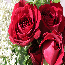

In [55]:
roses_img